### Import Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

## Ice cream data

In [3]:
df_ice_cream = pd.read_csv('./data/ice_cream.csv')

In [4]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [5]:
df_ice_cream.rename(columns = {'DATE': 'date', 'IPN31152N': 'production'}, inplace = True)

In [6]:
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

In [7]:
df_ice_cream.set_index('date', inplace = True)

In [8]:
# just get the data from 2010 onwards
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

In [9]:
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


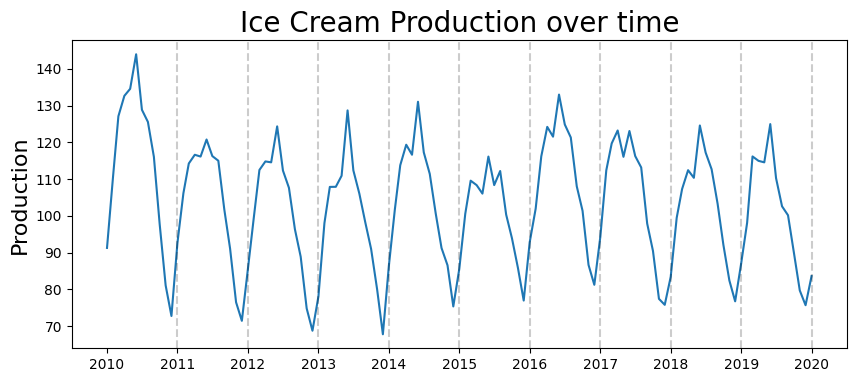

In [10]:
plt.figure(figsize = (10, 4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over time', fontsize = 20)
plt.ylabel('Production', fontsize = 16)

for year in range(2011, 2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color = 'k', linestyle = '--', alpha = 0.2)

### ACF

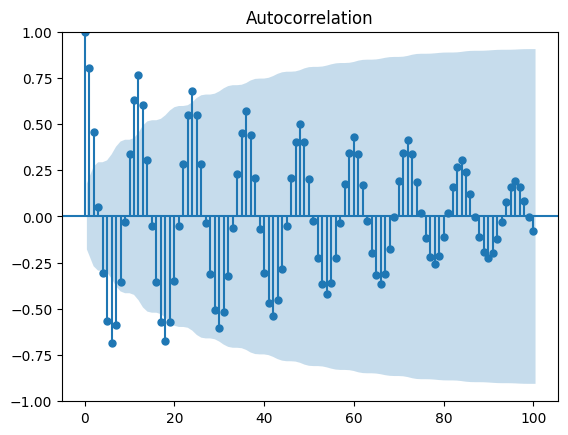

In [11]:
acf_plot = plot_acf(df_ice_cream.production, lags = 100)

In the long run the ACF is going to 0. Initially there are large oscillations but soon it oscillates between the blue band which means they are not statistically significant.

For an AR (autoregressive) model the ACF should be exhibit a diminishing behavior over time. This is exactly what we see here.

**based on this decaying ACF, we are likely dealing with an Auto regressive process**

### PACF

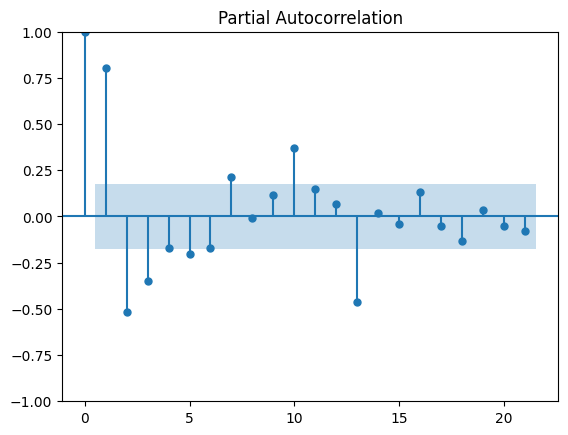

In [12]:
pacf_plot = plot_pacf(df_ice_cream.production)

The first one is at timestep 0, i.e. a correlation with oneself and that is 1.

But there are strong lags at 1, 2, 3, and then slowly gets into the blue band. Again there are few strong correlation at later lags.

**Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13**

## Stock Data

In [13]:
import yfinance as yf

In [14]:
tickerSymbol = 'SPY'

In [15]:
tickerData = yf.Ticker(tickerSymbol)

In [17]:
tickerDf = tickerData.history(period = '1d', start = '2015-1-1', end = '2020-1-1')

In [19]:
tickerDf = tickerDf[['Close']]

In [20]:
tickerDf.head()

,Close
Date,
2015-01-02 00:00:00-05:00,176.788879
2015-01-05 00:00:00-05:00,173.596161
2015-01-06 00:00:00-05:00,171.961044
2015-01-07 00:00:00-05:00,174.103897
2015-01-08 00:00:00-05:00,177.193344


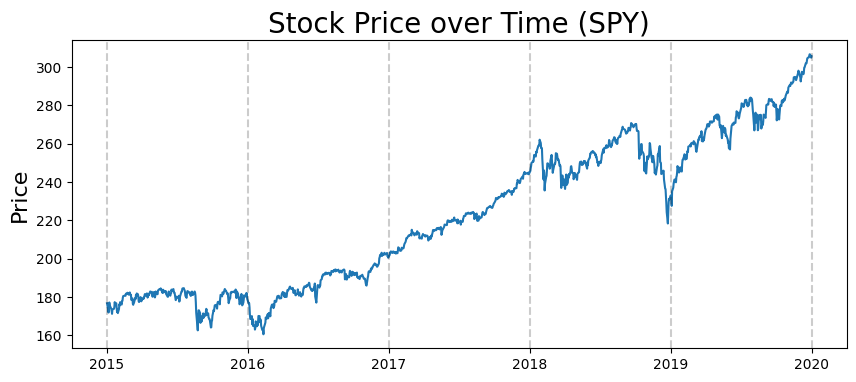

In [22]:
plt.figure(figsize = (10, 4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize = 20)
plt.ylabel('Price', fontsize = 16)

for year in range(2015, 2021):
    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color = 'k', linestyle = '--', alpha = 0.2)

The graph is not stationary. There is definitely an upward trend as the economy grew. So, there is a trend and also might be seasonality, volatality etc.
So, to make it stationary let's take the first difference i.e. the difference between the stock price of previous day with today and plot that.

### Stationarity : take first difference of this series

In [27]:
first_diffs = tickerDf.Close.values[1: ] - tickerDf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [29]:
tickerDf['FirstDifference'] = first_diffs

In [30]:
tickerDf.head()

,Close,FirstDifference
Date,,
2015-01-02 00:00:00-05:00,176.788879,-3.192719
2015-01-05 00:00:00-05:00,173.596161,-1.635117
2015-01-06 00:00:00-05:00,171.961044,2.142853
2015-01-07 00:00:00-05:00,174.103897,3.089447
2015-01-08 00:00:00-05:00,177.193344,-1.419952


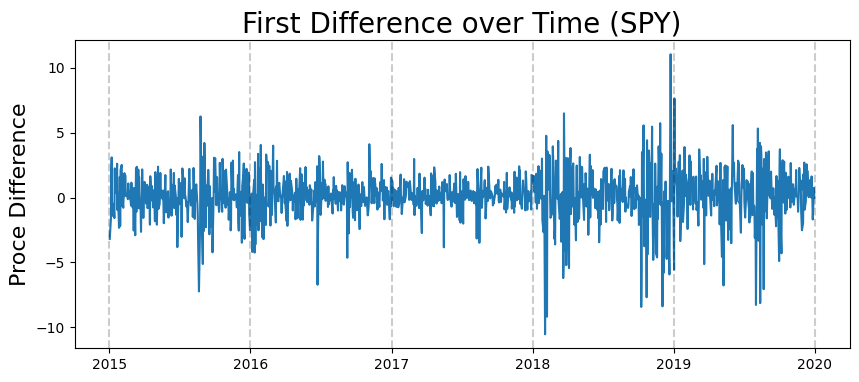

In [31]:
plt.figure(figsize = (10, 4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize = 20)
plt.ylabel('Proce Difference', fontsize = 16)

for year in range(2015, 2021):
    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color = 'k', linestyle = '--', alpha = 0.2)

Right now it seems to be centered around 0 and not growing over time. Although it has certain amount of volatality. Doesn't look like it has a strong seasonal component to it.

### ACF

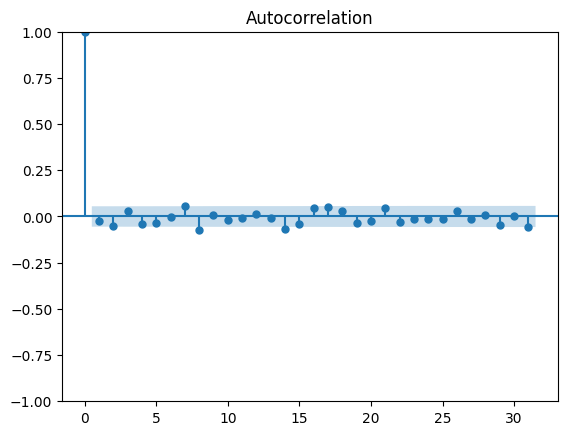

In [32]:
acf_plot = plot_acf(tickerDf.FirstDifference)

ACF isn't that informative

### PACF

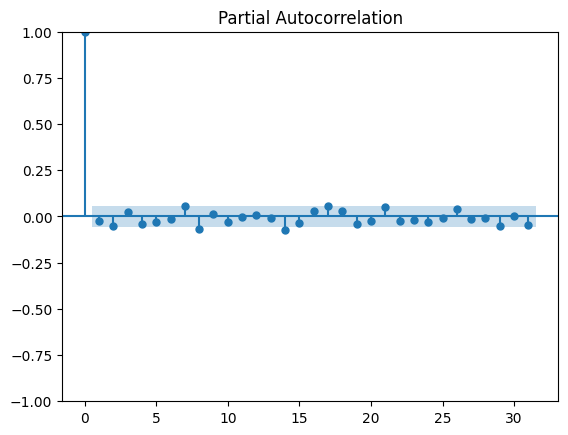

In [33]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)

Looks same, as there are no strong evidence.